## To identify Whether the client has subscribed a term deposit or not 
#### Binomial ("yes" or "no")


In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [40]:
bank =pd.read_csv('bank-full.csv', sep =';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:
bank.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [42]:
bank.shape


(45211, 17)

In [43]:
bank = bank.dropna()

In [44]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [45]:
bank.drop(bank.columns[[1, 2, 3, 8,9, 10,15]], axis = 1, inplace = True)

In [46]:
bank

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,no,2143,yes,no,261,1,-1,0,no
1,44,no,29,yes,no,151,1,-1,0,no
2,33,no,2,yes,yes,76,1,-1,0,no
3,47,no,1506,yes,no,92,1,-1,0,no
4,33,no,1,no,no,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,977,3,-1,0,yes
45207,71,no,1729,no,no,456,2,-1,0,yes
45208,72,no,5715,no,no,1127,5,184,3,yes
45209,57,no,668,no,no,508,4,-1,0,no


In [47]:
bank.shape

(45211, 10)

In [48]:
bank= bank.replace({'default': {'yes': 1, 
                                'no': 0}, 
                   'housing': {'yes': 1, 'no': 0},
                   'loan': {'yes': 1, 'no': 0},
                   'y': {'yes': 1, 'no': 0}})

In [49]:
bank

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,261,1,-1,0,0
1,44,0,29,1,0,151,1,-1,0,0
2,33,0,2,1,1,76,1,-1,0,0
3,47,0,1506,1,0,92,1,-1,0,0
4,33,0,1,0,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1
45207,71,0,1729,0,0,456,2,-1,0,1
45208,72,0,5715,0,0,1127,5,184,3,1
45209,57,0,668,0,0,508,4,-1,0,0


In [111]:
X_train, X_test, y_train, y_test

(       default  balance  housing  loan  duration  campaign  pdays  previous  y
 13932        0      658        0     0       724         1     -1         0  1
 9894         0     1699        0     0        63         1     -1         0  0
 39946        0     2823        1     0       102         4     96         2  0
 9217         0      214        1     1       247         1     -1         0  0
 4124         0      323        1     0       138         1     -1         0  0
 ...        ...      ...      ...   ...       ...       ...    ...       ... ..
 30403        0      995        0     0        39         1     -1         0  0
 21243        0      750        1     0       233        12     -1         0  0
 42613        0      323        0     0       261         2     -1         0  1
 43567        0      616        0     0       149         2    182         1  0
 2732         0       57        1     0       194         4     -1         0  0
 
 [36168 rows x 9 columns],
        def

In [113]:
X = bank.iloc[:, 1:]
y = bank.iloc[:, 9]

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [115]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### Finding the Training Accuracy

In [55]:
y_pred_train = classifier.predict(X_train)

In [56]:
y_pred_train_df = pd.DataFrame({'actual': y_train,
                               'predicted_prob': y_pred_train})

In [57]:
y_pred_train_df

,actual,predicted_prob
13932,1,1
9894,0,0
39946,0,0
9217,0,0
4124,0,0
...,...,...
30403,0,0
21243,0,0
42613,1,1
43567,0,0


In [116]:
from sklearn.metrics import accuracy_score
print(f'Training-set accuracy score: {round(accuracy_score(y_train, y_pred_train), 3)}')

Training-set accuracy score: 0.994


## Testing Accuracy


In [60]:
y_pred_test = classifier.predict(X_test)

In [61]:
y_pred_test_df = pd.DataFrame({'actual': y_test,
                              'predicted_prob': y_pred_test})

In [62]:
y_pred_test_df

,actual,predicted_prob
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
18448,1,1
6654,0,0
17106,0,0
9025,1,1


In [117]:
acc_val = accuracy_score (y_test, y_pred_test)
acc_val_rounded = round(acc_val, 4)

In [118]:
print(f'Testing-set accuracy score: {acc_val_rounded}')

Testing-set accuracy score: 0.9929


### Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalse Positives(FP) = ', FP)

print('\nFalse Negatives(FN) = ', FN)



Confusion matrix

 [[7968   12]
 [  52 1011]]

True Positives(TP) =  7968

True Negatives(TN) =  1011

False Positives(FP) =  12

False Negatives(FN) =  52


<AxesSubplot:>

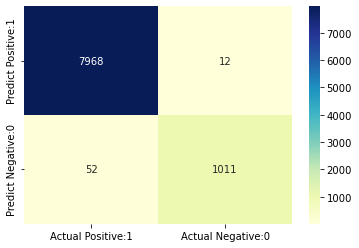

In [66]:
# visualizing confusion matrix
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


### Classification Report

In [70]:
classification_accuracy = (TP+TN)/(TP+TN+FP+FN)
print(f'Classification accuracy : {round(classification_accuracy,4)}')



Classification accuracy : 0.9929


In [72]:
classification_error = (FP+FN)/(TP+TN+FP+FN)
print(f'Classification error : {round(classification_error, 4)}')

Classification error : 0.0071


In [74]:
precision = TP /float(TP+FP)
print(f'Precision: {round(precision,4)}')

Precision: 0.9985


In [75]:
recall= TP/float(TP+FN)
print(f'Recall : {round(recall, 4)}')

Recall : 0.9935


### False Positive Rate

In [76]:
false_positive_rate = FP/float(FP+TN)

print(f'False Positive Rate: {round(false_positive_rate, 4)}')

False Positive Rate: 0.0117


### Specifity

In [78]:
specifity = TN/ (TN+FP)
print(f'Specifity: {round(specifity, 4)}')

Specifity: 0.9883


### Adjusting the threshold levels

In [119]:
y_pred_prob = classifier.predict_proba(X_test)[0:10]
y_pred_prob

array([[9.99993517e-01, 6.48331714e-06],
       [2.18254100e-02, 9.78174590e-01],
       [9.99767850e-01, 2.32149765e-04],
       [9.99999360e-01, 6.39558893e-07],
       [9.99999901e-01, 9.87856982e-08],
       [9.99999494e-01, 5.06236715e-07],
       [9.99999195e-01, 8.04902593e-07],
       [9.99991714e-01, 8.28610834e-06],
       [9.98981286e-01, 1.01871389e-03],
       [9.99910088e-01, 8.99124453e-05]])

In [120]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['not subscribing a deposit(0)', 'subscribing a deposit(1)'])
y_pred_prob_df

,not subscribing a deposit(0),subscribing a deposit(1)
0,0.999994,6.483317e-06
1,0.021825,9.781746e-01
2,0.999768,2.321498e-04
3,0.999999,6.395589e-07
4,1.000000,9.878570e-08
5,0.999999,5.062367e-07
6,0.999999,8.049026e-07
7,0.999992,8.286108e-06
8,0.998981,1.018714e-03
9,0.999910,8.991245e-05


In [121]:
from sklearn.metrics import classification_report
print(classification_report (y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7980
           1       0.99      0.95      0.97      1063

    accuracy                           0.99      9043
   macro avg       0.99      0.97      0.98      9043
weighted avg       0.99      0.99      0.99      9043



In [122]:
classifier.predict_proba(X_test)[0:10, 1]

array([6.48331714e-06, 9.78174590e-01, 2.32149765e-04, 6.39558893e-07,
       9.87856982e-08, 5.06236715e-07, 8.04902593e-07, 8.28610834e-06,
       1.01871389e-03, 8.99124453e-05])

In [123]:
y_pred1 = classifier.predict_proba(X_test)
y_pred1[:, 1]

array([6.48331714e-06, 9.78174590e-01, 2.32149765e-04, ...,
       6.43986366e-04, 9.99948603e-01, 7.41270104e-05])

In [124]:
pred_threshold = pd.DataFrame( columns =['Threshold',
                                        'Correct_Predictions',
                                        'FP',
                                        'FN',
                                        'Precision',
                                        'Recall'], index = None)
pred_threshold


,Threshold,Correct_Predictions,FP,FN,Precision,Recall


In [129]:
from sklearn.preprocessing import binarize

for i in range(1,10):
    
    cm1=0
    
    y_pred1 = classifier.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1)
    
    cm1 = confusion_matrix(y_test, y_pred2)

    TP = cm1[0,0]
    TN = cm1[1,1]
    FP = cm1[0,1]
    FN = cm1[1,0]
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
   
    pred_threshold = pred_threshold.append({'Threshold':i,
                               'Correct_Predictions':TP+FP,
                               'FP':FP,
                               'FN':FN,
                               'Precision':TP/(TP+FP),
                               'Recall':TP/(TP+FN)}, ignore_index=True)  


In [130]:
pred_threshold

,Threshold,Correct_Predictions,FP,FN,Precision,Recall
0,1.0,7980.0,7980.0,0.0,0.0,NaN
1,2.0,7980.0,7980.0,0.0,0.0,NaN
2,3.0,7980.0,7980.0,0.0,0.0,NaN
3,4.0,7980.0,7980.0,0.0,0.0,NaN
4,5.0,7980.0,7980.0,0.0,0.0,NaN
5,6.0,7980.0,7980.0,0.0,0.0,NaN
6,7.0,7980.0,7980.0,0.0,0.0,NaN
7,8.0,7980.0,7980.0,0.0,0.0,NaN
8,9.0,7980.0,7980.0,0.0,0.0,NaN


### Checking for overfitting and underfitting

In [131]:
print(f'Training Set score: {round(classifier.score(X_train, y_train), 4)}')
print(f'Test set score: {round(classifier.score(X_test, y_test), 4)}')

Training Set score: 0.9943
Test set score: 0.9929


## ROC Curve

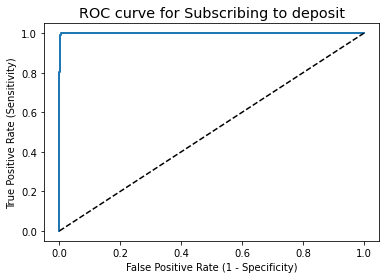

In [132]:


from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve( y_test, y_pred1)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Subscribing to deposit')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()



In [133]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred1)

In [134]:
auc

0.9997493734335839

In [135]:
auc
# a high auc of almost 100% states the model is a perfect fit and is able to predict accurately

0.9997493734335839

In [136]:
classifier.predict_proba(X)

array([[9.99999112e-01, 8.87561898e-07],
       [9.99999533e-01, 4.67186564e-07],
       [9.99999968e-01, 3.18026294e-08],
       ...,
       [7.31703023e-07, 9.99999268e-01],
       [9.92737930e-01, 7.26207031e-03],
       [9.81239193e-01, 1.87608067e-02]])

In [137]:
X.info

<bound method DataFrame.info of        default  balance  housing  loan  duration  campaign  pdays  previous  y
0            0     2143        1     0       261         1     -1         0  0
1            0       29        1     0       151         1     -1         0  0
2            0        2        1     1        76         1     -1         0  0
3            0     1506        1     0        92         1     -1         0  0
4            0        1        0     0       198         1     -1         0  0
...        ...      ...      ...   ...       ...       ...    ...       ... ..
45206        0      825        0     0       977         3     -1         0  1
45207        0     1729        0     0       456         2     -1         0  1
45208        0     5715        0     0      1127         5    184         3  1
45209        0      668        0     0       508         4     -1         0  0
45210        0     2971        0     0       361         2    188        11  0

[45211 rows x 9 col

### Basis the overall paramters and matrix, we can conclude the prediction is highly accurate and can confirm if the client has subscribed to loan or not